In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import zfit
from flarefly.data_handler import DataHandler
from flarefly.fitter import F2MassFitter
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
from particle import Particle

/home/fchinu/.virtualenv/ml/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
with open('/home/fchinu/Run3/Ds_pp_13TeV/Systematics/RawYields/results/pt25.0_30.0_no_histos.pkl', 'rb') as f:
    d = pickle.load(f)

2024-04-03 16:58:05.206745: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


(8000.0, 11000.0)

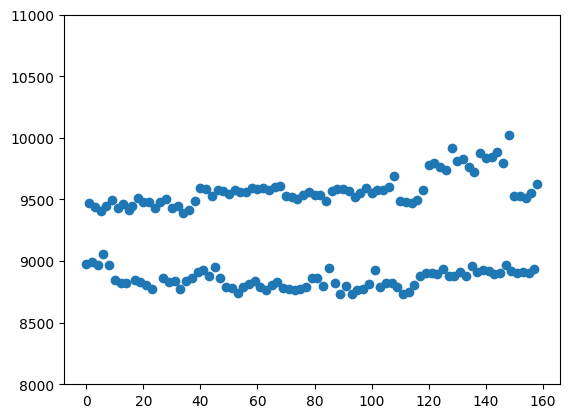

In [3]:
plt.scatter(range(len(d['rawyieldsDplus'])), d['rawyieldsDplus'])
plt.ylim(8000, 11000)

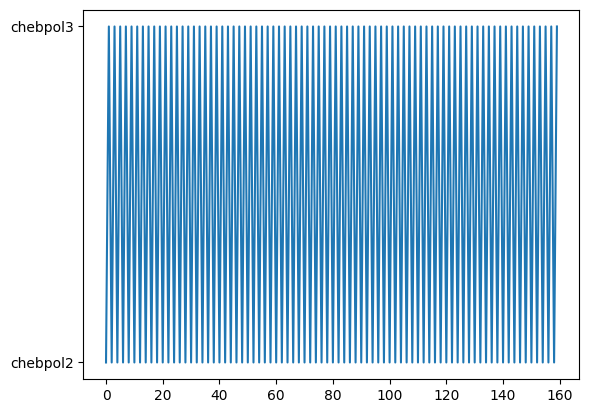

In [4]:
plt.plot([d['trials'][i][3] for i in range(len(d['trials']))])

# Chebpol2

In [5]:
pt_min, pt_max = 2.5, 3.0
data_hdl = DataHandler(data='/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/Data/Projections_Data.root', var_name="fM",
                        histoname=f'hMass_{pt_min*10:.0f}_{pt_max*10:.0f}',
                        limits=[1.74,2.10], rebin=2)
data_corr_bkg = DataHandler(data='/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/DplusForTemplateHistos_Train165702.root', var_name="fM",
                            histoname=f'hDplusTemplate_{pt_min*10:.0f}_{pt_max*10:.0f}',
                            limits=[1.74,2.10], rebin=2)

fitter = F2MassFitter(data_hdl, name_signal_pdf=["gaussian", "gaussian"],
                        name_background_pdf=["chebpol2", "hist"],
                        name=f"ds_pt{pt_min*10:.0f}_{pt_max*10:.0f}", chi2_loss=False,
                        verbosity=7, tol=1.e-1)

# bkg initialisation
fitter.set_background_initpar(0, "c0", 0.6)
fitter.set_background_initpar(0, "c1", -0.2)
fitter.set_background_initpar(0, "c2", 0.01)
fitter.set_background_initpar(0, "frac", 0.7)
fitter.set_background_template(1, data_corr_bkg)
fitter.set_background_initpar(0, "frac", 0.7, limits=[0., 1.])

# signals initialisation
fitter.set_particle_mass(0, pdg_id=431, limits=[Particle.from_pdgid(431).mass*0.99e-3,
                                                Particle.from_pdgid(431).mass*1.01e-3])
fitter.set_signal_initpar(0, "sigma", 0.008, limits=[0.005, 0.030])
fitter.set_signal_initpar(0, "frac", 0.1, limits=[0., 1.])
fitter.set_particle_mass(1, pdg_id=411,
                            limits=[Particle.from_pdgid(411).mass*0.99e-3,
                                    Particle.from_pdgid(411).mass*1.01e-3])
fitter.set_signal_initpar(1, "sigma", 0.008, limits=[0.005, 0.030])
fitter.set_signal_initpar(1, "frac", 0.1, limits=[0., 1.])



fit_result =fitter.mass_zfit()

loc = ["lower left", "upper left"]
ax_title = r"$M(\mathrm{KK\pi})$ GeV$/c^2$"


I MnSeedGenerator Computing seed using NumericalGradient calculator
I MnSeedGenerator Initial state: FCN =      -1428843.439 Edm =        33246.0007 NCalls =     29
I NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -1439743.685
  Edm           : 16385.16398
  Internal parameters:	[     -0.927295213     -0.927295213     0.4115168201  3.028146623e-06    -0.8633130462  3.187992744e-06    -0.8633130462  1.562457407e-07  -2.00000003e-07  9.999999776e-09]	
  Internal gradient  :	[      58885.32159      74764.93566      83789.93924      10043.88056     -5267.494824      3287.393386     -3815.392125 -5.280310956e+11 -4.286925791e+11 -3.289801618e+11]	
  Internal covariance matrix:
[[  2.0828504e-06              0              0              0              0              0              0              0              0              0]
 [              0  2.1164715e-06              0     

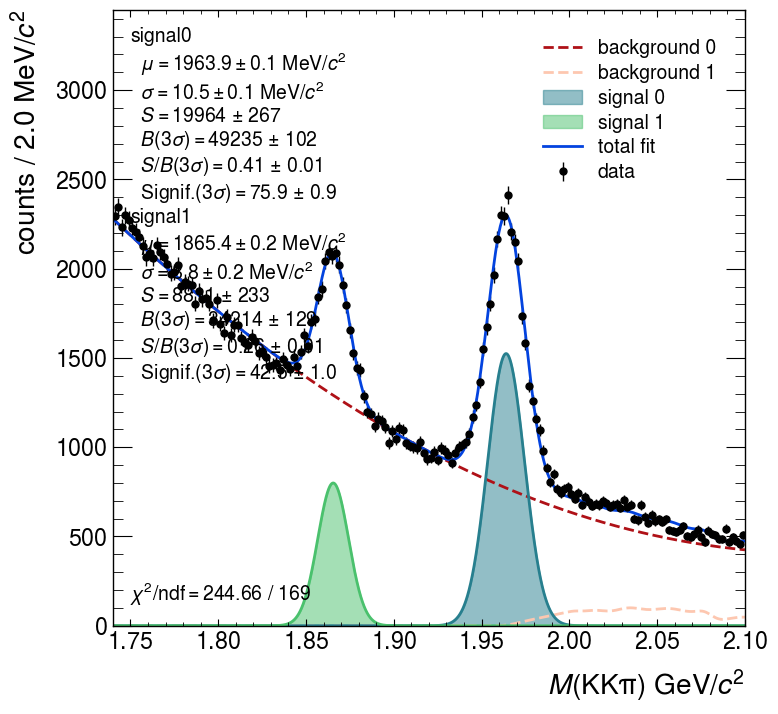

In [6]:
fig = fitter.plot_mass_fit(style="ATLAS", show_extra_info=True,
                            figsize=(8, 8), extra_info_loc=loc,
                            axis_title=ax_title)


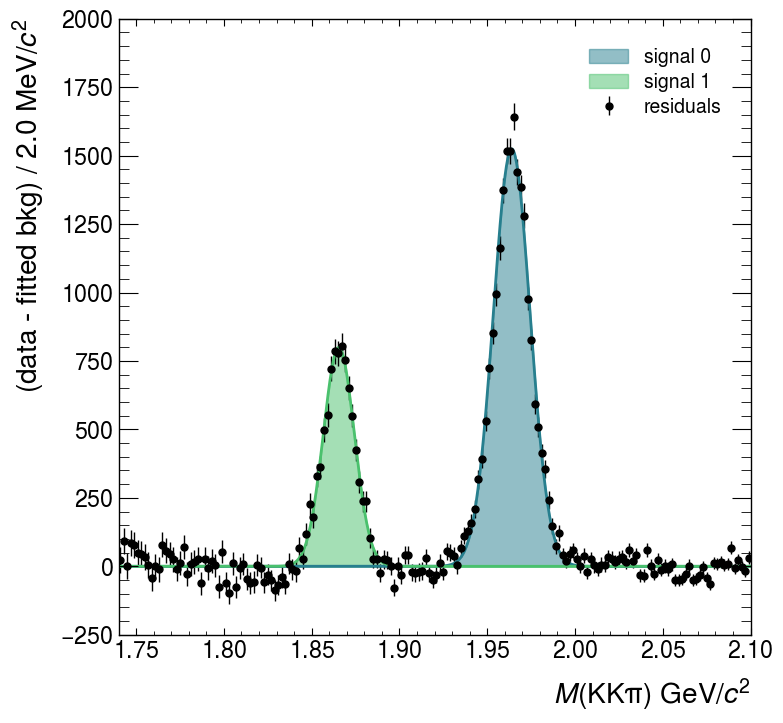

In [7]:
figres = fitter.plot_raw_residuals(figsize=(8, 8), style="ATLAS",
                                extra_info_loc=loc, axis_title=ax_title)

In [9]:
fitter.get_raw_yield()

(20018.4900616248, 268.0472629632294)

In [10]:
fitter.get_raw_yield(1)

(8835.16565538048, 233.93227202982573)

# Chebpol3


In [11]:
pt_min, pt_max = 2.5, 3.0
data_hdl = DataHandler(data='/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/Data/Projections_Data.root', var_name="fM",
                        histoname=f'hMass_{pt_min*10:.0f}_{pt_max*10:.0f}',
                        limits=[1.74,2.10], rebin=2)
data_corr_bkg = DataHandler(data='/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/DplusForTemplateHistos_Train165702.root', var_name="fM",
                            histoname=f'hDplusTemplate_{pt_min*10:.0f}_{pt_max*10:.0f}',
                            limits=[1.74,2.10], rebin=2)

fitter = F2MassFitter(data_hdl, name_signal_pdf=["gaussian", "gaussian"],
                        name_background_pdf=["chebpol3", "hist"],
                        name=f"ds_pt{pt_min*10:.0f}_{pt_max*10:.0f}2", chi2_loss=False,
                        verbosity=7, tol=1.e-1)

# bkg initialisation
fitter.set_background_initpar(0, "c0", 0.6)
fitter.set_background_initpar(0, "c1", -0.2)
fitter.set_background_initpar(0, "c2", 0.01)
fitter.set_background_initpar(0, "frac", 0.7)
fitter.set_background_template(1, data_corr_bkg)
fitter.set_background_initpar(0, "frac", 0.7, limits=[0., 1.])

# signals initialisation
fitter.set_particle_mass(0, pdg_id=431, limits=[Particle.from_pdgid(431).mass*0.99e-3,
                                                Particle.from_pdgid(431).mass*1.01e-3])
fitter.set_signal_initpar(0, "sigma", 0.008, limits=[0.005, 0.030])
fitter.set_signal_initpar(0, "frac", 0.1, limits=[0., 1.])
fitter.set_particle_mass(1, pdg_id=411,
                            limits=[Particle.from_pdgid(411).mass*0.99e-3,
                                    Particle.from_pdgid(411).mass*1.01e-3])
fitter.set_signal_initpar(1, "sigma", 0.008, limits=[0.005, 0.030])
fitter.set_signal_initpar(1, "frac", 0.1, limits=[0., 1.])



fit_result =fitter.mass_zfit()

loc = ["lower left", "upper left"]
ax_title = r"$M(\mathrm{KK\pi})$ GeV$/c^2$"


I MnSeedGenerator Computing seed using NumericalGradient calculator
I MnSeedGenerator Initial state: FCN =      -1431536.446 Edm =       25706.68358 NCalls =     33
I NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -1441241.682
  Edm           : 8082.773197
  Internal parameters:	[     -0.927295213     -0.927295213     0.4115168201  3.028146623e-06    -0.8633130462  3.187992744e-06    -0.8633130462  2.664515537e-07  -2.00000003e-07  9.999999776e-09....   1.000000015e-07]	
  Internal gradient  :	[      146.1652434      21731.86522     -12462.70443      10147.99239     -6285.738863      3020.499661     -3316.049064  1.178966322e+10  3.759499203e+10      -8234713109....   4.459230805e+10]	
  Internal covariance matrix:
[[  8.3616705e-06              0              0              0              0              0              0              0              0              0....      

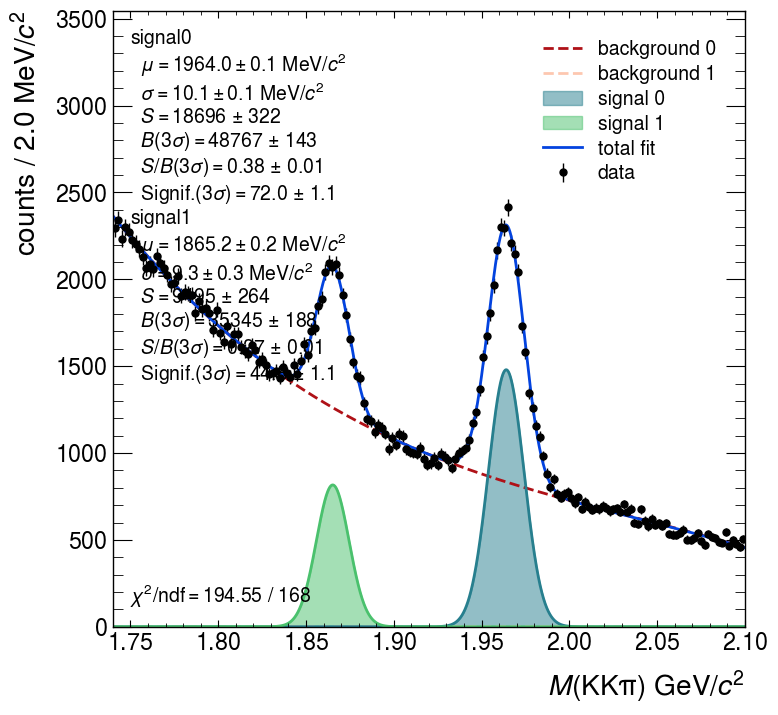

In [12]:
fig = fitter.plot_mass_fit(style="ATLAS", show_extra_info=True,
                            figsize=(8, 8), extra_info_loc=loc,
                            axis_title=ax_title)


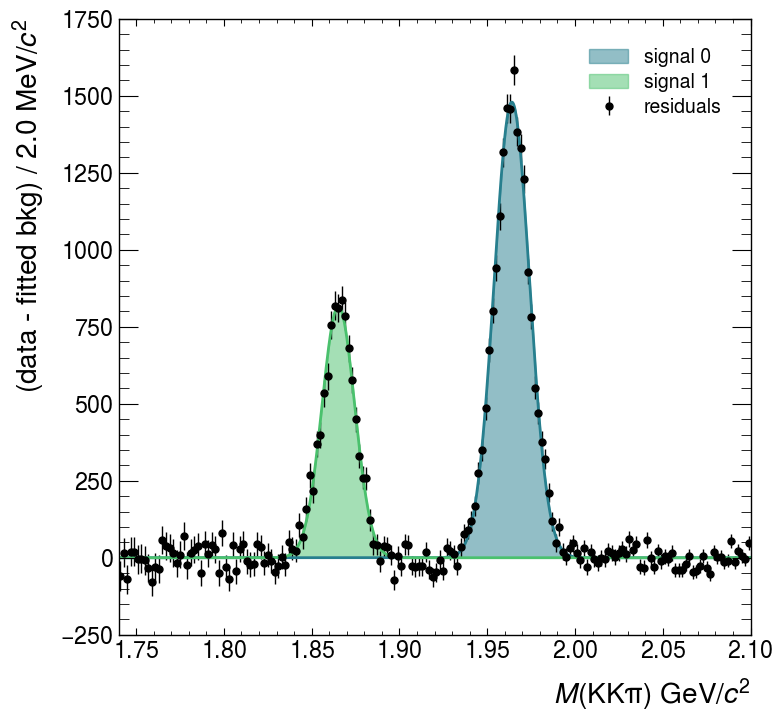

In [13]:
figres = fitter.plot_raw_residuals(figsize=(8, 8), style="ATLAS",
                                extra_info_loc=loc, axis_title=ax_title)

In [14]:
fitter.get_raw_yield(0)

(18746.98435792877, 322.86830544750194)

In [15]:
fitter.get_raw_yield(1)

(9521.073022138477, 264.6071715255208)

# Expo


In [19]:
pt_min, pt_max = 2.5, 3.0
data_hdl = DataHandler(data='/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/Data/Projections_Data.root', var_name="fM",
                        histoname=f'hMass_{pt_min*10:.0f}_{pt_max*10:.0f}',
                        limits=[1.74,2.10], rebin=2)
data_corr_bkg = DataHandler(data='/home/fchinu/Run3/Ds_pp_13TeV/Projections_RawYields/DplusForTemplateHistos_Train165702.root', var_name="fM",
                            histoname=f'hDplusTemplate_{pt_min*10:.0f}_{pt_max*10:.0f}',
                            limits=[1.74,2.10], rebin=2)

fitter = F2MassFitter(data_hdl, name_signal_pdf=["gaussian", "gaussian"],
                        name_background_pdf=["expo", "hist"],
                        name=f"ds_pt{pt_min*10:.0f}_{pt_max*10:.0f}3", chi2_loss=False,
                        verbosity=7, tol=1.e-1)

# bkg initialisation
fitter.set_background_initpar(0, "lam", -0.06)
fitter.set_background_initpar(0, "frac", 0.7)
fitter.set_background_template(1, data_corr_bkg)
fitter.set_background_initpar(0, "frac", 0.7, limits=[0., 1.])

# signals initialisation
fitter.set_particle_mass(0, pdg_id=431, limits=[Particle.from_pdgid(431).mass*0.99e-3,
                                                Particle.from_pdgid(431).mass*1.01e-3])
fitter.set_signal_initpar(0, "sigma", 0.008, limits=[0.005, 0.030])
fitter.set_signal_initpar(0, "frac", 0.1, limits=[0., 1.])
fitter.set_particle_mass(1, pdg_id=411,
                            limits=[Particle.from_pdgid(411).mass*0.99e-3,
                                    Particle.from_pdgid(411).mass*1.01e-3])
fitter.set_signal_initpar(1, "sigma", 0.008, limits=[0.005, 0.030])
fitter.set_signal_initpar(1, "frac", 0.1, limits=[0., 1.])



fit_result =fitter.mass_zfit()

loc = ["lower left", "upper left"]
ax_title = r"$M(\mathrm{KK\pi})$ GeV$/c^2$"


I MnSeedGenerator Computing seed using NumericalGradient calculator
I MnSeedGenerator Initial state: FCN =      -1413488.786 Edm =       58737.70412 NCalls =     25
I MnSeedGenerator Initial state  
  Minimum value : -1413488.786
  Edm           : 58737.70412
  Internal parameters:	[     -0.927295213     -0.927295213     0.4115168201  3.028146623e-06    -0.8633130462  3.187992744e-06    -0.8633130462 -5.999999866e-08]	
  Internal gradient  :	[     -19660.95016     -19452.68692     -69909.88799      9517.198349      -2961.70198      5536.957514      -5753.21026  1.015297261e+10]	
  Internal covariance matrix:
[[  2.2948171e-05              0              0              0              0              0              0              0]
 [              0  2.1002829e-05              0              0              0              0              0              0]
 [              0              0  1.6123017e-05              0              0              0              0              0]
 [          

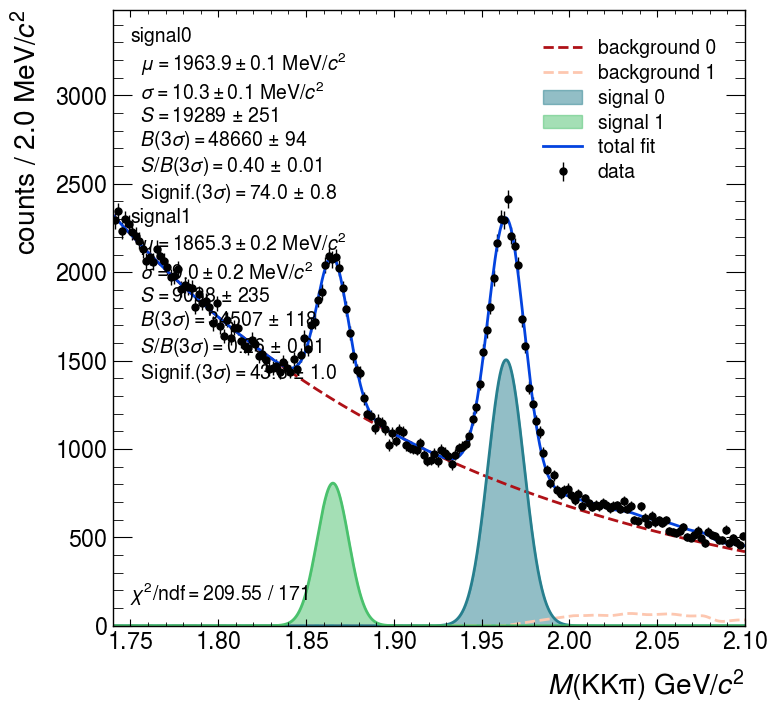

In [20]:
fig = fitter.plot_mass_fit(style="ATLAS", show_extra_info=True,
                            figsize=(8, 8), extra_info_loc=loc,
                            axis_title=ax_title)


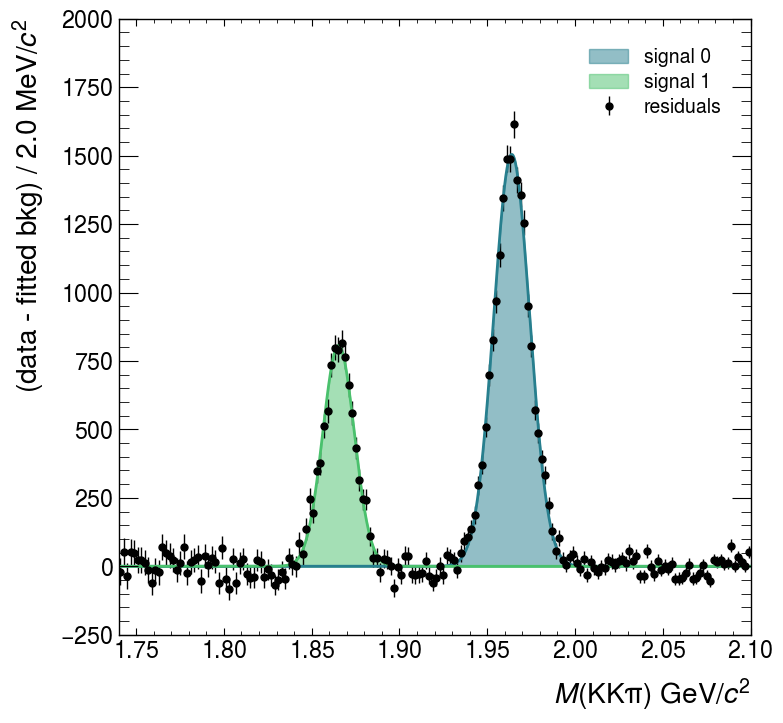

In [21]:
figres = fitter.plot_raw_residuals(figsize=(8, 8), style="ATLAS",
                                extra_info_loc=loc, axis_title=ax_title)

In [22]:
fitter.get_raw_yield(0)

(19341.512510559995, 251.44151255701254)

In [23]:
fitter.get_raw_yield(1)

(9062.520143822308, 235.47954926549187)

In [16]:
20018/8835

2.2657611771363895

In [18]:
18746/9521

1.9689108286944648

In [24]:
19341/9062

2.1342970646656365